# Project: Prediction of NO2 emissions in Zurich

## Machine learning model: k-nearest neighbors

### 1) Identify and discuss k-NN model, baseline, metrics and evaluation strategy

#### K-nearest neighbors

K-nearest neighbors model works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The class or value of the data point is then determined by the majority vote or average of the K neighbors. This approach allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data.

#### Baseline

The median value of the target (NO2) will be used for the baseline model.

#### Metrics

Mean absolute error (MAE) will be used for the metrics.

#### Evaluation

Model will be evaluated and compared with MAE, the mean of absolute differences between predicted and actual values of NO2 for the baseline and k-nearest neighbors model.

### 2) Tune k-NN model and analyze it's performance

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error as MAE

In [2]:
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
# load the data
train = pd.read_csv("train.csv", index_col=0, parse_dates=True)
test = pd.read_csv("test.csv", index_col=0, parse_dates=True)

In [4]:
# show first 5 entries of the training dataset
train.head()

,NO2,RainDur,PH,SH,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1
Timestamp,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,37.71,0,1,1,0.000000,1.000000,-0.781831,0.62349,0.0,1.0,3.807773,2.542389,0.683097,4.079738,0.314811,1.040277,87.47,-1.27,283.62,0.708036,977.72,0.04
2017-01-01 01:00:00,39.50,0,1,1,0.258819,0.965926,-0.781831,0.62349,0.0,1.0,3.656098,2.343727,0.896088,4.671707,0.307485,1.442202,87.41,-1.65,292.05,0.858662,977.22,0.03
2017-01-01 02:00:00,38.53,0,1,1,0.500000,0.866025,-0.781831,0.62349,0.0,1.0,3.701302,2.790551,0.854415,4.467057,0.314811,1.091923,87.13,-2.07,296.76,0.746688,976.62,0.04
2017-01-01 03:00:00,39.24,0,1,1,0.707107,0.707107,-0.781831,0.62349,0.0,1.0,3.677060,2.467252,0.703098,4.367928,0.307485,1.029619,86.82,-2.05,281.18,0.620576,976.16,0.03
2017-01-01 04:00:00,41.89,0,1,1,0.866025,0.500000,-0.781831,0.62349,0.0,1.0,3.694862,2.438863,0.932164,4.227709,0.307485,0.947789,87.26,-1.95,257.22,0.530628,975.58,0.03


In [5]:
# show first 5 entries of the test dataset
test.head()

,NO2,RainDur,PH,SH,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1
Timestamp,,,,,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,15.28,1,0,0,0.000000,1.000000,-0.433884,-0.900969,-0.5,0.866025,3.077773,1.190888,3.768845,2.143589,0.254642,0.357674,84.48,1.73,200.95,0.974560,956.71,0.03
2017-12-01 01:00:00,9.08,1,0,0,0.258819,0.965926,-0.433884,-0.900969,-0.5,0.866025,2.789937,0.824175,3.921181,1.968510,0.239017,0.336472,85.25,1.45,210.79,1.163151,956.62,0.03
2017-12-01 02:00:00,9.02,1,0,0,0.500000,0.866025,-0.433884,-0.900969,-0.5,0.866025,2.310553,0.307485,4.093177,1.528228,0.215111,0.329304,84.43,1.23,240.39,1.335001,956.50,0.02
2017-12-01 03:00:00,10.20,1,0,0,0.707107,0.707107,-0.433884,-0.900969,-0.5,0.866025,2.304583,0.157004,4.189958,1.504077,0.198851,0.307485,88.81,0.12,277.34,0.996949,957.39,0.04
2017-12-01 04:00:00,17.17,0,0,0,0.866025,0.500000,-0.433884,-0.900969,-0.5,0.866025,2.415914,0.350657,4.211387,1.472472,0.190620,0.392042,85.41,-0.14,251.82,0.746688,957.66,0.02


In [6]:
# size of the training dataset
print("Train:", train.shape)

# size of the test dataset
print("Test: ", test.shape)

Train: (8016, 22)
Test:  (744, 22)


Training dataset contains 11 months of data (hourly measurements), from  January to November 2017. Test dataset contains 1 month of data (hourly measurements), from December 2017.

Both datasets contain 22 columns:
- target feature (NO2)
- rain duration (RainDur)
- public holiday (PH)
- school holiday (SH)
- cyclically encoded features for hour, day and month (6 columns)
- 6 lagged air quality features (NO2_lag1, NO_lag1, O3_lag1, PM10_lag1, CO_lag1, SO2_lag1)
- 6 lagged meteorological features (Hr_lag1, T_lag1, WD_lag1, WVv_lag1, p_lag1, StrGlo_lag1)

In [7]:
# one-hot encoding for the RainDur, PH and SH
train = pd.get_dummies(train, columns=['RainDur', 'PH', 'SH'])
test = pd.get_dummies(test, columns=['RainDur', 'PH', 'SH'])

In [8]:
# show first 5 entries of the training dataset
train.head()

,NO2,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1,RainDur_0,RainDur_1,PH_0,PH_1,SH_0,SH_1
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,37.71,0.000000,1.000000,-0.781831,0.62349,0.0,1.0,3.807773,2.542389,0.683097,4.079738,0.314811,1.040277,87.47,-1.27,283.62,0.708036,977.72,0.04,1,0,0,1,0,1
2017-01-01 01:00:00,39.50,0.258819,0.965926,-0.781831,0.62349,0.0,1.0,3.656098,2.343727,0.896088,4.671707,0.307485,1.442202,87.41,-1.65,292.05,0.858662,977.22,0.03,1,0,0,1,0,1
2017-01-01 02:00:00,38.53,0.500000,0.866025,-0.781831,0.62349,0.0,1.0,3.701302,2.790551,0.854415,4.467057,0.314811,1.091923,87.13,-2.07,296.76,0.746688,976.62,0.04,1,0,0,1,0,1
2017-01-01 03:00:00,39.24,0.707107,0.707107,-0.781831,0.62349,0.0,1.0,3.677060,2.467252,0.703098,4.367928,0.307485,1.029619,86.82,-2.05,281.18,0.620576,976.16,0.03,1,0,0,1,0,1
2017-01-01 04:00:00,41.89,0.866025,0.500000,-0.781831,0.62349,0.0,1.0,3.694862,2.438863,0.932164,4.227709,0.307485,0.947789,87.26,-1.95,257.22,0.530628,975.58,0.03,1,0,0,1,0,1


In [9]:
# show first 5 entries of the test dataset
test.head()

,NO2,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1,RainDur_0,RainDur_1,PH_0,PH_1,SH_0,SH_1
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,15.28,0.000000,1.000000,-0.433884,-0.900969,-0.5,0.866025,3.077773,1.190888,3.768845,2.143589,0.254642,0.357674,84.48,1.73,200.95,0.974560,956.71,0.03,0,1,1,0,1,0
2017-12-01 01:00:00,9.08,0.258819,0.965926,-0.433884,-0.900969,-0.5,0.866025,2.789937,0.824175,3.921181,1.968510,0.239017,0.336472,85.25,1.45,210.79,1.163151,956.62,0.03,0,1,1,0,1,0
2017-12-01 02:00:00,9.02,0.500000,0.866025,-0.433884,-0.900969,-0.5,0.866025,2.310553,0.307485,4.093177,1.528228,0.215111,0.329304,84.43,1.23,240.39,1.335001,956.50,0.02,0,1,1,0,1,0
2017-12-01 03:00:00,10.20,0.707107,0.707107,-0.433884,-0.900969,-0.5,0.866025,2.304583,0.157004,4.189958,1.504077,0.198851,0.307485,88.81,0.12,277.34,0.996949,957.39,0.04,0,1,1,0,1,0
2017-12-01 04:00:00,17.17,0.866025,0.500000,-0.433884,-0.900969,-0.5,0.866025,2.415914,0.350657,4.211387,1.472472,0.190620,0.392042,85.41,-0.14,251.82,0.746688,957.66,0.02,1,0,1,0,1,0


In [10]:
# size of the training dataset
print("Train:", train.shape)

# size of the test dataset
print("Test: ", test.shape)

Train: (8016, 25)
Test:  (744, 25)


Training dataset has 8016 rows and 25 columns. Test dataset has 744 rows and 25 columns. There are 3 more columns in both datasets because of one-hot encoding that was applied to public holiday (PH), school holiday (SH) and rain duration (RainDur). 

In [11]:
# specify features and target for the training set
X = train.drop(["NO2"], axis=1).values
y = train["NO2"]

# specify features and target for the test set
X_te = test.drop('NO2', axis=1).values
y_te = test["NO2"]

In [12]:
# baseline
baseline = MAE(y_te, np.median(y) * np.ones(len(y_te)))
print("baseline MAE: {:.2f}".format(baseline))

baseline MAE: 15.93


The MAE score of the baseline is 15.93  µg/m3. Median was used to calculate the baseline.

In [13]:
# k-nn: hyperparameter tuning with cross-validation

# number of nearest neighbors (tuning values)
n_values = np.arange(1, 25, 1)

# variable to store the grid search results
gs_results = []

# grid search
for n in n_values:
    
    # pipeline
    pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=n))])
    
    # model with target transformation
    model_knn = TransformedTargetRegressor(regressor=pipeline, 
                                           func=np.log1p, 
                                           inverse_func=np.expm1)
        
    # cross-validation object
    cv = TimeSeriesSplit(n_splits=5, test_size=24 * 30 * 1)
    
    # split train set into training and validation sets with 5 splits
    for tr, val in cv.split(X):
        X_tr, X_val = X[tr], X[val]
        y_tr, y_val = y[tr], y[val]
     
        # fit the model
        model_knn.fit(X_tr, y_tr)

        # save the results of model performance on training and validation sets
        gs_results.append(
            {"n": n,
            "train_mae": MAE(y_tr, model_knn.predict(X_tr)),
            "validation_mae": MAE(y_val, model_knn.predict(X_val))
            }
        )

Pipeline consists of the standard scaler and k-NN regression. 

k-NN regression was tuned with 24 values of nearest neighbors, from 1 to 24.

TranformedTargetRegressor was used for the log transformation (log1p) of the target (NO2).

Cross-validation object (cv) was created with the TimeSeriesSplit. The number of splits is 5 and the validation set is 1 month (24 hours multiplied by 30 days).

Training and validation MAE scores with corresponding number of neighbors were saved in the grid search results.

In [14]:
# convert grid search results to dataframe
gs_results = pd.DataFrame(gs_results)

# sort grid search results by the mean validation mae score
gs_results.groupby(['n']).mean().sort_values(by="validation_mae", ascending=True).head()

,train_mae,validation_mae
n,,
14,5.525047,7.596865
15,5.583705,7.602900
13,5.449501,7.608569
16,5.648437,7.613128
17,5.708637,7.617035


The smallest mean validation error is 7.60 µg/m3 which is 37% higher than the mean training error of 5.52 µg/m3. 

The optimal number of neighbors is 14. 

In [15]:
# optimal number of neighbors
best_n = gs_results.groupby("n")["validation_mae"].mean().idxmin()

In [16]:
# standard deviation of the training error for 21 neighbors
gs_results[gs_results['n']==best_n]['train_mae'].std().round(4)

0.0734

In [17]:
# standard deviation of the validation error for 21 neighbors
gs_results[gs_results['n']==best_n]['validation_mae'].std().round(4)

1.0257

Standard deviation of the validation error is 1.03 which is 14x higher that the standard deviation of the training error (0.073). The cross-validation showed that the model is not robust when exposed to unseen data.

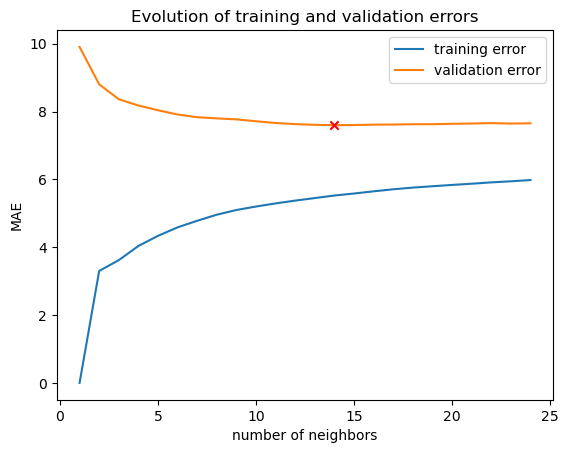

In [18]:
# plot the training error against the number of neighbors
plt.plot(gs_results.groupby("n")["train_mae"].mean().index, 
             gs_results.groupby("n")["train_mae"].mean().values, 
             label="training error")

# plot the validation error against the number of neighbors
plt.plot(gs_results.groupby("n")["validation_mae"].mean().index, 
             gs_results.groupby("n")["validation_mae"].mean().values, 
             label="validation error")

# mark optimal number of neighbors
plt.scatter(gs_results.groupby("n")["validation_mae"].mean().idxmin(),
            gs_results.groupby("n")["validation_mae"].mean().min(),
            marker="x", c="red", zorder=10)

plt.title("Evolution of training and validation errors")
plt.xlabel("number of neighbors")
plt.ylabel("MAE")
plt.legend()
plt.show()

The optimal number of neighbors is 14. The model is overfitting. There is a gap between the errors, that is decreasing with the increasing number of neighbors.

In [19]:
# pipeline
tuned_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=best_n))])
    
# model with target transformation
tuned_model_knn = TransformedTargetRegressor(regressor=tuned_pipeline, 
                                             func=np.log1p, 
                                             inverse_func=np.expm1)

# fit tuned knn
tuned_model_knn.fit(X, y)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('knn',
                                                      KNeighborsRegressor(n_neighbors=14))]))

In [20]:
# evaluate on the test set
y_pred_knn = tuned_model_knn.predict(X_te)

knn_mae = MAE(y_te, y_pred_knn)
print("k-NN MAE: {:.2f}".format(knn_mae))

k-NN MAE: 7.41


The MAE score of the tuned k-NN model on the test set is 7.41 µg/m3.

### 3) Discuss the results and potential trade-offs

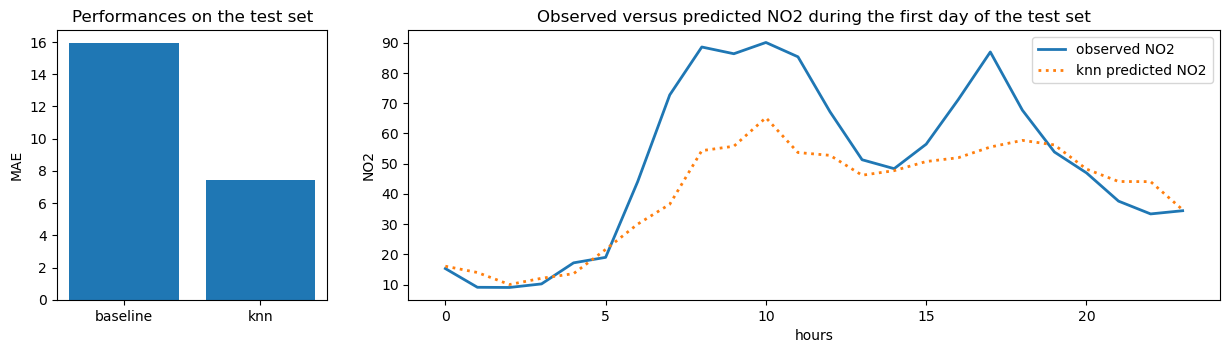

In [21]:
# plots with MAE scores and observed and predicted NO2 on the first day

# defining the number of subplots and setting the size
fig, axes = plt.subplots(
    1, 2, figsize=(15, 3.5), gridspec_kw={"wspace": 0.15, "width_ratios": [1, 3]}
)

# plot with MAE scores of the baseline and k-NN model
axes[0].bar(np.arange(2), [baseline, knn_mae])
axes[0].set_xticks(np.arange(2))
axes[0].set_xticklabels(("baseline", "knn"))
axes[0].set_ylabel("MAE")
axes[0].set_title("Performances on the test set")

# plot with observed and predicted values during the first day of the test set
axes[1].plot(y_te.values[:24], lw=2, label="observed NO2")
axes[1].plot(y_pred_knn[:24], ls=":", lw=2, label="knn predicted NO2")

axes[1].set_title("Observed versus predicted NO2 during the first day of the test set")
axes[1].set_xlabel("hours")
axes[1].set_ylabel("NO2")
axes[1].legend()

plt.show()

The MAE score of the k-NN model (7.41 µg/m3) is 2x lower than the baseline of 15.93 µg/m3.

The first day of the test set, Friday, December 1, 2017, shows significant underpredictions during the daytime.

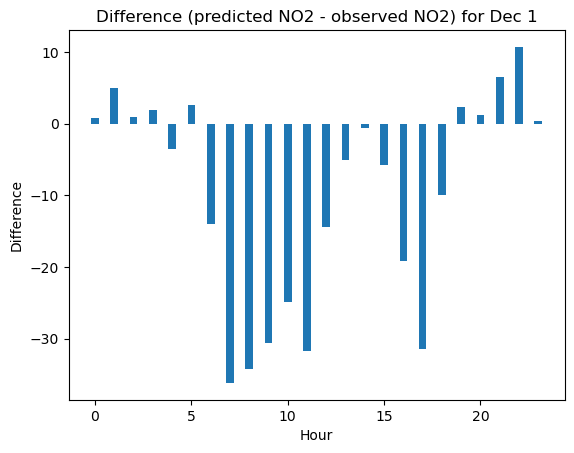

In [22]:
# plot the difference (predicted NO2 - observed NO2) for the first day
plt.bar(np.arange(0,24,1), (y_pred_knn[:24]-y_te[:24]), width = 0.4)

plt.title('Difference (predicted NO2 - observed NO2) for Dec 1')
plt.xlabel('Hour')
plt.ylabel('Difference')
plt.show()

Bar plot with differences between predicted NO2 and observed NO2 on Friday, December 1, show significant underpredictions (up to -35 µg/m3) from 06:00 to 19:00, and small overpredictions in the night.

In [23]:
# dataframe with observed and predicted NO2

# convert observed NO2 (y_te) to dataframe
df_diff = y_te.to_frame()

# add column with predicted NO2
df_diff['NO2_pred'] = y_pred_knn.tolist()

# calculate the difference: NO2 predicted - NO2 observed
df_diff['Diff'] = df_diff['NO2_pred'] - df_diff['NO2']

# add time feature (hour)
df_diff['Hour'] = df_diff.index.hour

# add time feature (day)
df_diff["Day"] = df_diff.index.day

In [24]:
# show first 5 entries
df_diff.head()

,NO2,NO2_pred,Diff,Hour,Day
Timestamp,,,,,
2017-12-01 00:00:00,15.28,16.056395,0.776395,0,1
2017-12-01 01:00:00,9.08,13.978612,4.898612,1,1
2017-12-01 02:00:00,9.02,9.992982,0.972982,2,1
2017-12-01 03:00:00,10.20,12.063617,1.863617,3,1
2017-12-01 04:00:00,17.17,13.598262,-3.571738,4,1


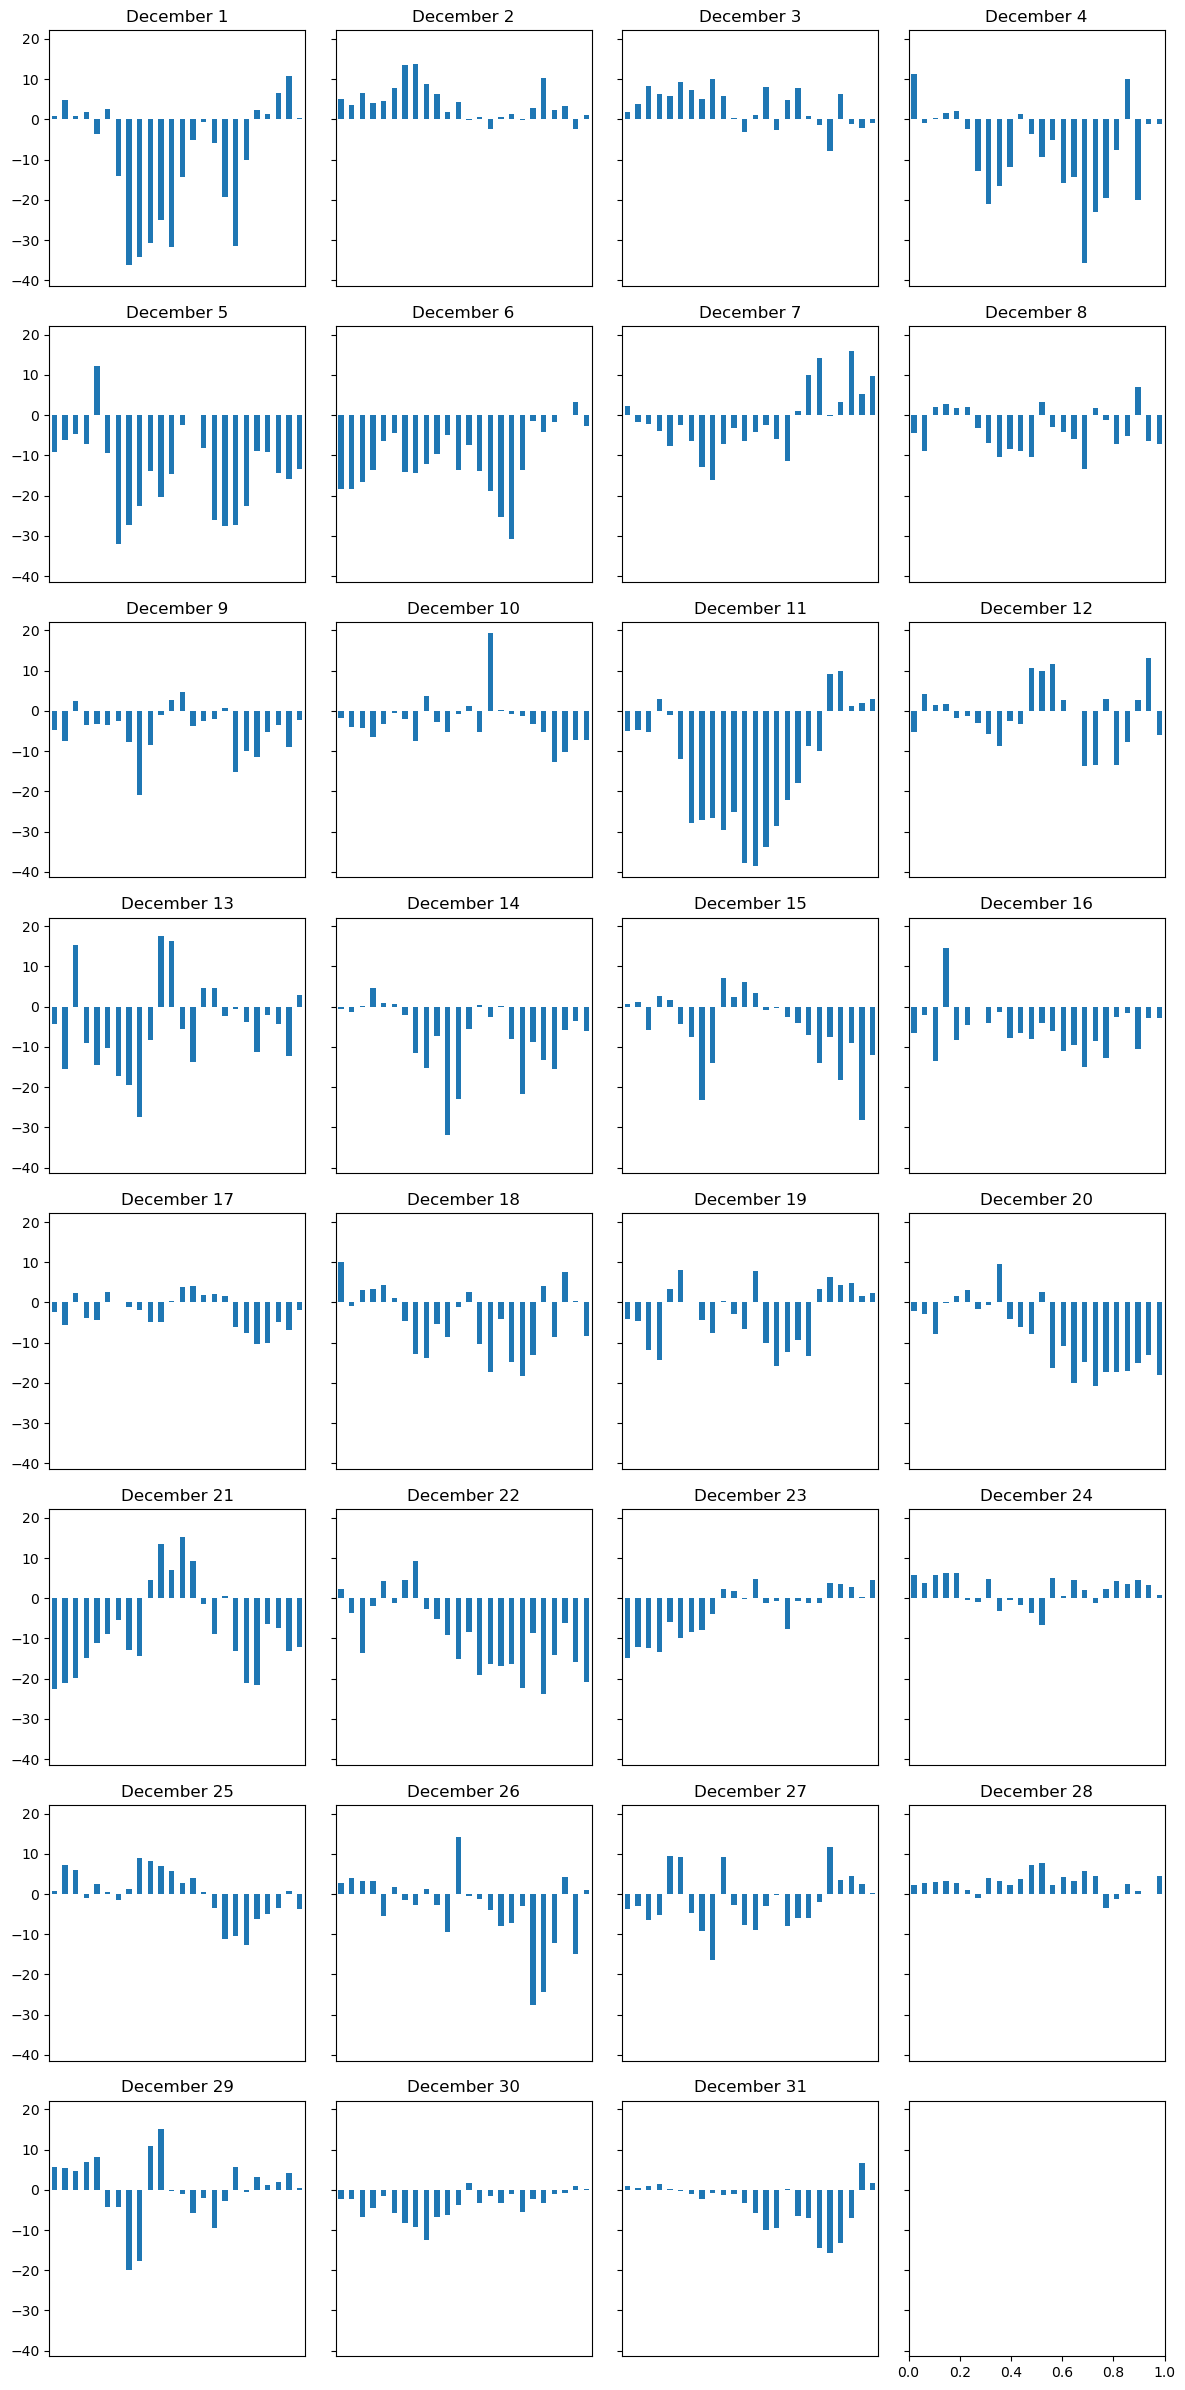

In [25]:
# plot the difference (predicted NO2 - observed NO2) for the whole test set 

# defining the number of subplots and setting the size
fig, axes = plt.subplots(nrows=8, ncols=4, sharey=True, figsize=(12, 24))

for i in range(8):
    for j in range(4):
        day = 4*i+j+1
        if (day < 32):
            df_diff[df_diff['Day']==day]['Diff'].plot(ax=axes[i,j], kind='bar')
            axes[i,j].set_title("December " + str(day))
            axes[i,j].get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()

Bar plots with the difference between predicted NO2 and observed NO2 for the whole month of December show mainly underpredictions throughout the day.

On weekends (December 2, 3, 9, 10, 16, 17, 23, 24, 30, 31) differences between predicted NO2 and observed NO2 are not that high as on working days.

The model was trained on the train set from January to November, which makes December predictions harder. A larger training dataset of at least a year should provide better results. 

### 4) Summary

K-nearest neighbors model was trained and tuned on the train set (11 months) and predictions were made on the test set (1 month).

First, one-hot encoding was applied to 3 features, rain duration (RainDur), public holiday (PH) and school holiday (SH). Then, using a pipeline, standard scaler and k-nearest neighbors regression were applied. k-NN regression was tuned with 24 values of nearest neighbors, from 1 to 24. TranformedTargetRegressor was used for the log transformation (log1p) of the target (NO2). Cross-validation object (cv) was created with the TimeSeriesSplit. The number of splits was 5 and the validation set was 1 month (24 hours multiplied by 30 days).

The optimal number of neighbors is 14. The smallest mean validation error is 7.60 µg/m3 which is 37% higher than the mean training error of 5.52 µg/m3. Standard deviation of the validation error is 1.03 which is 14x higher that the standard deviation of the training error (0.073). The cross-validation showed that the model is not robust when exposed to unseen data. 

Tuned model with the optimal number of neighbors was fitted on the train set and evaluated on the test set. The MAE score of the tuned k-NN model is 7.41 µg/m3, which is 2x lower than the baseline of 15.93 µg/m3.

The first day of the test set, Friday, December 1, 2017, showed significant underpredictions during the daytime and small overpredictions in the night.

The whole test set (December 2017) showed mainly underpredictions throughout the day.

Training the model on a larger dataset, instead of 11 months, should improve the predictions.